In [1]:
import pandas as pd
import matplotlib.pyplot as plt # standard convention for importing the plotting tool
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
dt = pd.read_csv('data/pythondevsurvey2017_raw_data.csv')
dt = dt.dropna(how='all')

# First clean up the collumns #

In [3]:
dt.rename(columns={'Is Python the main language you use for your current projects?':'main_language'}, inplace=True)
dt.rename(columns={'Do you\xa0regularly work on multiple projects at the same time?':'multiple'}, inplace=True)
dt.rename(columns={'What country do you live in?':'country'}, inplace=True)
purpose = '\xa0What do you use Python for?'
upgrade = 'What do you typically use to upgrade your Python version?'
framework = 'What framework(s) do you use in addition to Python?'
technology = 'What additional technology(s) do you use in addition to Python?'
cloud = 'What cloud platform(s) do you use?'
ide = 'What editor(s)/IDE(s) have you considered for use in your Python development?'
job = 'Which of the following best describes your job role(s)?'
often = 'When developing in Python, how often do you…?'
question = 'Please think about the total number of Python Web Developers in the world and the total number of Data Scientists using Python.'
for column in list(dt.columns):
    if purpose in column or upgrade in column or framework in column or technology in column or cloud in column or ide in column or job in column or often in column or question in column:
        dt.drop(column, inplace=True, axis=1)
more_columns_to_drop = [ 'How often do you use your main editor?', 'Are you missing any features in your main editor?', 'How likely is it that you would recommend your main editor to a friend or colleague?', 'Most of the time, do you...?', 'How many people are in your project team?', 'What is your employment status?', "Choose one from the list::Which of the following industries best describes your company's business?", 'Choose one from the list::Which of the following industries do you develop for?', 'How long have you been working in the IT industry?','What do you use Python for the most?', 'Which version of Python do you use the most?', 'What is the main editor you use for your current Python development?','How did you first learn about your main editor?', 'Could you tell us your age range?']
dt.drop(more_columns_to_drop, inplace=True, axis=1)

In [4]:
def clean_columns(column):
    languages = 'What other language(s) do you use?'
    if languages in column:
        return column.replace(' - Write In', '').replace(languages, '').replace(':', '').lower()
    else:
        return column
dt.columns = list(map(clean_columns, list(dt.columns)))
dt.rename(columns={'none':'python'}, inplace=True)

In [5]:
false_answer = 'No, I don’t use Python for my current projects'
dt['main_language'] = dt['main_language'].apply(lambda x: False if x == false_answer else True)

In [6]:
def multiple_projects(value):
    if value == 'No,  I only work on one project':
        return 'one'
    elif value == 'Yes, I work on one main and several side projects':
        return 'several'
    elif value == 'Yes, I work on many different projects':
        return 'multiple'
    else:
        return 'several'
dt.fillna(False, inplace=True)
dt['country'] = dt['country'].apply(lambda x: 'Other' if not x else x)
dt['multiple'] = dt['multiple'].apply(multiple_projects)
dt['multiple'] = dt['multiple'].astype('category')
dt['country'] = dt['country'].astype('category')

In [7]:
static = ('Java', 'C#', 'C/C++', 'Objective-C', 'Go', 'Scala', 'SQL', 'Kotlin', 'Swift', 'Rust', 'TypeScript')
dynamic = ('JavaScript', 'PHP', 'Ruby', 'Bash / Shell', 'Visual Basic', 'R', 'Clojure', 'Perl', 'Groovy', 'CoffeeScript')
other = ('HTML', 'CSS', 'Other')

# Results

## How many people have filled the survey?

In [8]:
print('Survey was filled by', dt.shape[0], 'respondents.')

Survey was filled by 9506 respondents.


## How many of them use Python in any project?

In [9]:
dt_py = dt[dt['main_language']]
print(dt_py.shape[0], 'respondents use python in their project.')

8112 respondents use python in their project.


## How many Pythonist from CZ and SK filled the survey?

In [10]:
print('Survey was filled by', dt_py.loc[dt_py['country'] == 'Czech Republic'].shape[0], 'respondents from Czech Republic.')
print('Survey was filled by', dt_py.loc[dt_py['country'] == 'Slovakia'].shape[0], 'respondents from Slovakia.')

Survey was filled by 59 respondents from Czech Republic.
Survey was filled by 30 respondents from Slovakia.


## How many Pythonist use statically typed languages?

In [11]:
total_static = set()
for lan in static:
    total_static.update(list(dt_py[dt_py[lan.lower()].apply(lambda x: True if x else x)].index))
print(len(total_static), 'of respondents use staticly typed languages.')

6129 of respondents use staticly typed languages.


## How many Pythonist use dynamically typed languages?

In [12]:
total_dynamic = set()
for lan in dynamic:
    total_dynamic.update(list(dt_py[dt_py[lan.lower()].apply(lambda x: True if x else x)].index))
print(len(total_dynamic), 'of respondents use dynamicali typed languages.')

5899 of respondents use dynamicali typed languages.


## How many Pythonist use statically typed and dynamically typed languages?

In [13]:
total_both = set()
for d_lan in dynamic:
    for s_lan in static: 
        total_both.update(list(dt_py[dt_py[d_lan.lower()].apply(lambda x: True if x else x) & 
                                     dt_py[s_lan.lower()].apply(lambda x: True if x else x)].index))
print(len(total_both), 'of respondents use dynamicali and staticaly typed languages.')

4665 of respondents use dynamicali and staticaly typed languages.


### preparation for graphs

In [14]:
dt_py_one = dt_py.loc[dt_py['multiple'] == 'one']
dt_py_several = dt_py.loc[dt_py['multiple'] == 'several']
dt_py_multiple = dt_py.loc[dt_py['multiple'] == 'multiple']

In [15]:
total_one = {}
for lan in dynamic + static:
    total_one[lan] = len((list(dt_py_one[dt_py_one[lan.lower()].apply(lambda x: True if x else x)].index))) / dt_py.shape[0] * 100

In [16]:
total_several = {}
for lan in dynamic + static:
    total_several[lan] = len((list(dt_py_several[dt_py_several[lan.lower()].apply(lambda x: True if x else x)].index))) / dt_py.shape[0] * 100

In [17]:
total_multiple = {}
for lan in dynamic + static:
    total_multiple[lan] = len((list(dt_py_multiple[dt_py_multiple[lan.lower()].apply(lambda x: True if x else x)].index))) / dt_py.shape[0] * 100

In [18]:
total_one_python = set(list(dt_py_one.index))
total_several_python = set(list(dt_py_several.index))
total_multiple_python = set(list(dt_py_multiple.index))

for lan in dynamic + static:
    total_one_python = total_one_python.intersection(list(dt_py_one[dt_py_one[lan.lower()] == False].index))
    total_several_python = total_several_python.intersection(list(dt_py_several[dt_py_several[lan.lower()] == False].index))
    total_multiple_python = total_multiple_python.intersection(list(dt_py_multiple[dt_py_multiple[lan.lower()] == False].index))

total_one['Only Python'] = len(total_one_python) / dt_py.shape[0] * 100
total_several['Only Python'] = len(total_several_python) / dt_py.shape[0] * 100
total_multiple['Only Python'] = len(total_multiple_python) / dt_py.shape[0] * 100

In [19]:
work = {'No, I only work on one project': total_one, 'Yes, I work on one main and several side projects': total_several, 'Yes, I work on many different projects': total_multiple}

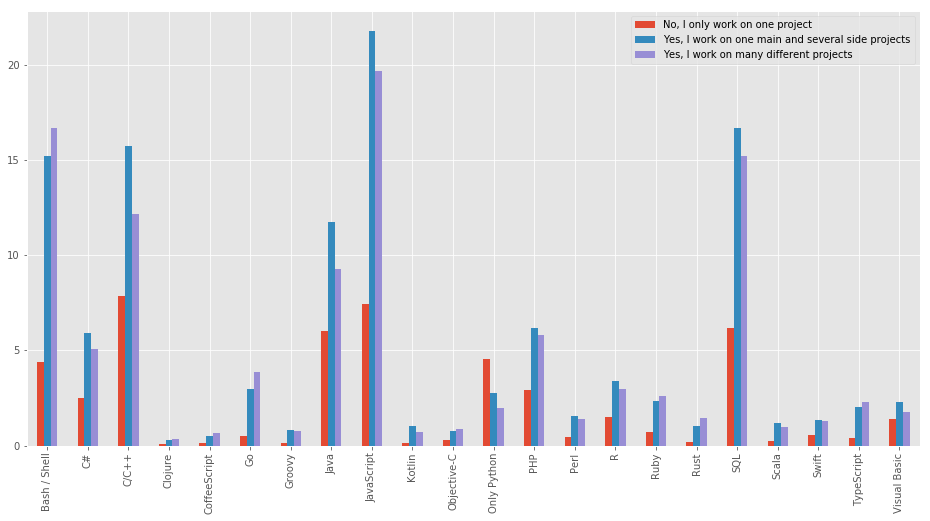

In [20]:
pd.DataFrame.from_dict(work).plot.bar(figsize=(16,8))